In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [39]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

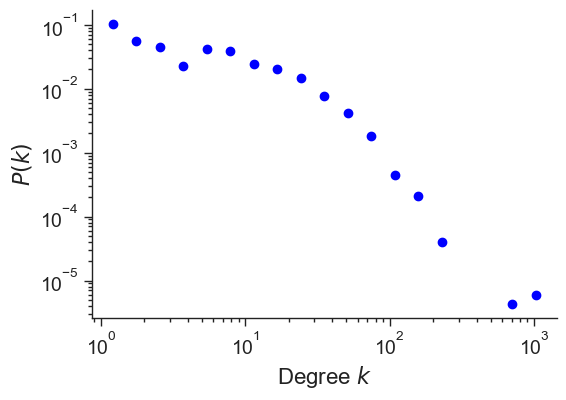

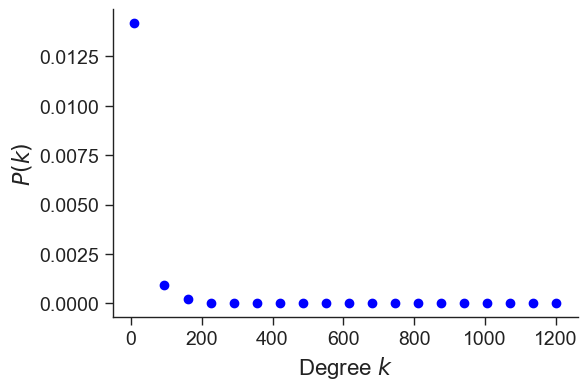

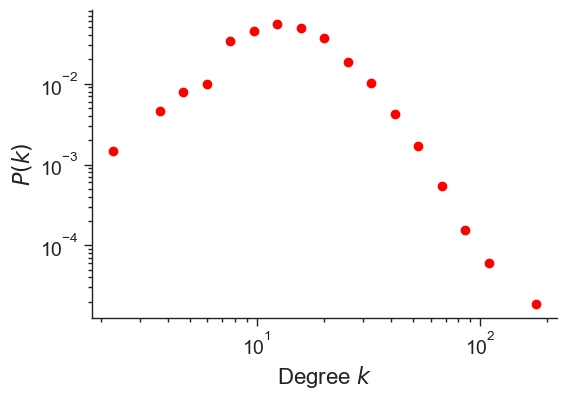

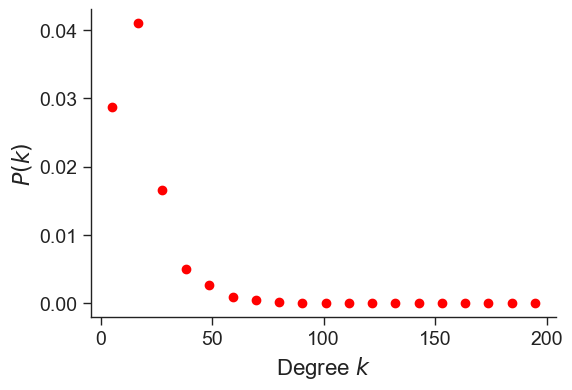

Number of Pokémon: 905
Number of Episodes: 1236
Average Pokémon Degree: 26.770165745856353
Average Episode Degree: 19.601132686084142


In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read edge list
G = nx.read_edgelist('../../datasets/clean/edge_list.csv', 
                     delimiter=",",  
                     nodetype=int,    
                     encoding='utf-8', comments="Source")

# Load the node list
node_df = pd.read_csv('../../datasets/clean/pokemon_nodes.csv')  # Adjust path if needed

# Add missing nodes to the graph
for node_id in node_df['Id']:
    if node_id not in G:
        G.add_node(node_id)  # Add node without edges

# Classify nodes
pokemon_nodes = {node for node in G.nodes if node < 10000}
episode_nodes = set(G.nodes) - pokemon_nodes

# Compute degrees
pokemon_degrees = np.array([G.degree(n) for n in pokemon_nodes])
episode_degrees = np.array([G.degree(n) for n in episode_nodes])

# Remove zero-degree nodes for log-log plotting (avoiding log(0) errors)
pokemon_degrees_nonzero = pokemon_degrees[pokemon_degrees > 0]
episode_degrees_nonzero = episode_degrees[episode_degrees > 0]

# Define function to plot both log-log and linear distributions
def plot_degree_distribution(degrees, title, color):
    if len(degrees) == 0:
        print(f"No nodes with nonzero degree for {title}. Skipping plot.")
        return

    kmin, kmax = degrees.min(), degrees.max()
    kmin = max(kmin, 1)  # Ensure kmin is at least 1 to avoid log(0)

    # Log-log plot
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.loglog(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    # plt.title(f"{title} Degree Distribution (Log-Log Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

    # Linear plot
    bin_edges = np.linspace(kmin, kmax, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.plot(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    # plt.title(f"{title} Degree Distribution (Linear Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

# Plot for Pokémon (excluding zero-degree nodes for log-log)
plot_degree_distribution(pokemon_degrees_nonzero, "Pokémon", "blue")

# Plot for Episodes (excluding zero-degree nodes for log-log)
plot_degree_distribution(episode_degrees_nonzero, "Episodes", "red")

# Print summary
print("Number of Pokémon:", len(pokemon_nodes))
print("Number of Episodes:", len(episode_nodes))
print("Average Pokémon Degree:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")
print("Average Episode Degree:", np.mean(episode_degrees) if len(episode_degrees) > 0 else "N/A")
